In [1]:
# imports
from Helper import Helper
from DatabaseManager import DatabaseManager

In [2]:
# load database
dbManager = DatabaseManager()
helper = Helper(dbManager)

terminating database....
terminating database....
terminating database....
terminating database....


In [3]:
# checking the users table
print(dbManager.runCommand("SELECT * FROM users LIMIT 5;"))
# checking the games table
print(dbManager.runCommand("SELECT * FROM games LIMIT 1;"))
# checking the gameStats table
print(dbManager.runCommand("SELECT * FROM gameStats LIMIT 1;"))

terminating database....
[('chessentialsblog', 'CM ', 2636), ('mikudo', None, 1695), ('desireiv', None, 1940), ('abqluke', None, 1469), ('milo1952', None, 2017)]
terminating database....
[('gYMMatov', 'resign', 'tr1os', 'panchojose', 'C40', ['e4', 'e5', 'Nf3', 'Bc5', 'Bc4', 'Nf6', 'd3', 'd5', 'exd5', 'Bxf2+', 'Kxf2', 'Ng4+', 'Ke1', 'c6', 'dxc6', 'Qb6', 'Rf1', 'Nxc6', 'Qe2', 'Nd4', 'Nxd4', 'Qxd4', 'Rf4', 'Qg1+', 'Rf1', 'Qxh2', 'Bxf7+', 'Ke7', 'Bg5+', 'Kd6', 'Qxg4', 'Bxg4', 'Nd2', 'Qxg2', 'Nc4+', 'Kc5', 'Be3+', 'Kc6', 'Nxe5+', 'Kd6', 'Nxg4', 'Qxg4', 'Rg1', 'Qf3', 'Kd2', 'Rhf8', 'Raf1', 'Qh3', 'Bf4+', 'Ke7', 'Bg5+', 'Kd6', 'Bf4+', 'Kc6', 'Bd5+', 'Kxd5', 'c4+', 'Kc5', 'Be3+', 'Kc6', 'Rh1', 'Qg2+', 'Kc3', 'Rxf1', 'Rxf1', 'Qxf1', 'b4', 'a5', 'b5+', 'Kd7', 'Kd4', 'Qf6+', 'Kd5', 'Qd6+', 'Ke4', 'Re8+', 'Kf3', 'Qf6+', 'Bf4', 'g5'], 1)]
terminating database....
[('M1i9n767', 'mate', 'benedictchessman', 2068, 2, 2, 2, 76, 'notsalomon', 2117, 4, 1, 0, 28, 'Sicilian Defense: Hyperaccelerated Dragon'

In [4]:
# checking the users table
print(dbManager.runCommand("SELECT COUNT(*) FROM users LIMIT 5;"))
# checking the games table
print(dbManager.runCommand("SELECT COUNT(*) FROM games LIMIT 1;"))
# checking the gameStats table
print(dbManager.runCommand("SELECT COUNT(*) FROM gameStats LIMIT 1;"))

terminating database....
[(5298,)]
terminating database....
[(3639,)]
terminating database....
[(3639,)]


In [5]:
dbManager.populateUsersTable("../Data/Scraped_Files/")
dbManager.populateGamesTable("../Data/Scraped_Files/")
dbManager.populateGameStatsTable("../Data/Scraped_Files/")

Creating creating values to add to users table


JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [6]:
users = dbManager.getDataFrame("SELECT * FROM users;")
games = dbManager.getDataFrame("SELECT * FROM games;")
gameStats = dbManager.getDataFrame("SELECT * FROM gameStats;")

In [7]:
users.head()

,userid,title,rating
0,chessentialsblog,CM,2636
1,mikudo,None,1695
2,desireiv,None,1940
3,abqluke,None,1469
4,milo1952,None,2017


<AxesSubplot: ylabel='Density'>

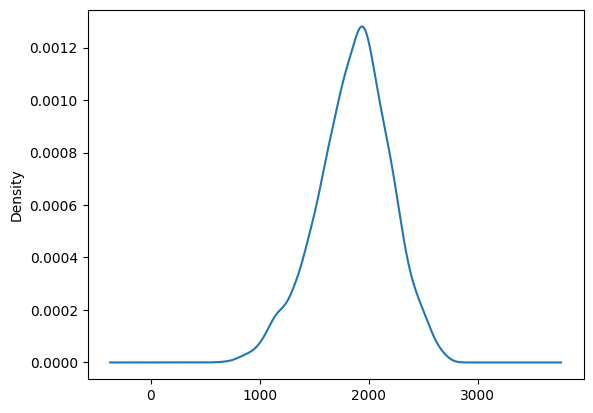

In [8]:
# check users distribution
users['rating'].plot.kde()

In [9]:
# we need more users rated under 1700
users_under_1700 = users[users['rating']<=1700]['userid']

In [10]:
done = []
new_username_set = set()
for user in users_under_1700:
    new_username = helper.scrape_n_rapid_games('../Data/Scraped_Files',user,5, True, True)
    new_username_set.add(new_username)
    done.append(user)

Expecting value: line 1 column 1 (char 0)
Added 0/5 to mikudo
Expecting value: line 1 column 1 (char 0)
Added 0/5 to abqluke
Expecting value: line 1 column 1 (char 0)
Added 0/5 to octatonic
Expecting value: line 1 column 1 (char 0)
Added 0/5 to rooots
Expecting value: line 1 column 1 (char 0)
Added 0/5 to jesusdo
Expecting value: line 1 column 1 (char 0)
Added 0/5 to ahimalya_das
Expecting value: line 1 column 1 (char 0)
Added 0/5 to nurasylzinetulla
Expecting value: line 1 column 1 (char 0)
Added 0/5 to mohamad556
Expecting value: line 1 column 1 (char 0)
Added 0/5 to aircrucifiar
Expecting value: line 1 column 1 (char 0)
Added 0/5 to simon2345
Expecting value: line 1 column 1 (char 0)
Added 0/5 to scc5199
Expecting value: line 1 column 1 (char 0)
Added 0/5 to kreyney
Expecting value: line 1 column 1 (char 0)
Added 0/5 to orno
Expecting value: line 1 column 1 (char 0)
Added 0/5 to mikethedyk
Expecting value: line 1 column 1 (char 0)
Added 0/5 to bagusimantaka
Expecting value: line 1 c

KeyboardInterrupt: 

In [ ]:
for user in done:
    users_under_1700.remove(user)

In [33]:
import os
import json

path = "../Data/Scraped_Files"
gameId = None
to_be_deleted = []
for user in os.listdir(path):
    for game in os.listdir(f"{path}/{user}"):
        if os.path.getsize(f"{path}/{user}/{game}") == 0:
            os.remove(f"{path}/{user}/{game}")
        with open(f"{path}/{user}/{game}", "r") as f:
            g = json.load(f)
            gameId = g['id']
            for game2 in os.listdir(f"{path}/{user}"):
                if game == game2:
                    continue
                with open(f"{path}/{user}/{game2}", "r") as f2:
                    g2 = json.load(f2)
                    gameId2 = g2['id']
                    if gameId == gameId2:
                        if os.path.isfile(f"{path}/{user}/{game}"):
                            to_be_deleted.append(f"{path}/{user}/{game}")

In [35]:
for filename in to_be_deleted:
    if filename[-7]==' ':
        print(filename)
        try:
            os.remove(filename)
        except:
            continue

../Data/Scraped_Files/busterdx/zJktauHN 2.json
../Data/Scraped_Files/Static_King/ksAcDycP 2.json
../Data/Scraped_Files/ilyoziq/eqoNkDsc 2.json
../Data/Scraped_Files/ilyoziq/ogVx7giv 2.json
../Data/Scraped_Files/Terence-Hell/ZY5syiu4 2.json
../Data/Scraped_Files/Terence-Hell/6PSyCYta 2.json
../Data/Scraped_Files/Terence-Hell/pgL5xAq5 2.json
../Data/Scraped_Files/Terence-Hell/n4syJwcf 2.json
../Data/Scraped_Files/ternoz/2WVi0H5s 2.json
../Data/Scraped_Files/ternoz/eqUwIX0l 2.json
../Data/Scraped_Files/TexasTimechessmonkey/tQrMTkhN 2.json
../Data/Scraped_Files/TexasTimechessmonkey/HGlpGvwQ 2.json
../Data/Scraped_Files/TexasTimechessmonkey/i1KC5EeQ 2.json
../Data/Scraped_Files/Nebelnoob/t1jsOW2X 2.json
../Data/Scraped_Files/ebrahimmonfared0/zfrwM3gQ 2.json
../Data/Scraped_Files/ebrahimmonfared0/t8HpjG8f 2.json
../Data/Scraped_Files/ebrahimmonfared0/ONCgPgPP 2.json
../Data/Scraped_Files/jvillalbac/gIMrSoJa 2.json
../Data/Scraped_Files/jvillalbac/p58rbIwQ 2.json
../Data/Scraped_Files/michmex

FileNotFoundError: [Errno 2] No such file or directory: '../Data/Scraped_Files/ils120182/RMpbpH3X 2.json'